In [1]:
%matplotlib inline

In [2]:
import os
import sys
import glob

import pandas

ADD_PATH = os.path.join(os.getcwd(), "..", "bin")
if ADD_PATH not in sys.path:
    sys.path.append(ADD_PATH)

from summarize_bw import parse_results

In [3]:
FILE_SYSTEMS = {"coribb": "288x DataWarp", "perlmutter": "1x E1000 OST", "cgpu": "1x VAST DBox"}
BENCHMARKS = ["elbencho", "ior"]

In [4]:
df = None

for file_system in FILE_SYSTEMS:
    for benchmark in BENCHMARKS:
        results_files = glob.glob(os.path.join("..", f"results.{file_system}", f"{benchmark}-scaling", "bw-direct*.out"))
        results_files += glob.glob(os.path.join("..", f"results.{file_system}", f"{benchmark}-scaling", "bw-direct*.csv"))
        print(file_system, benchmark, len(results_files))
        results = parse_results(results_files, fs=file_system, benchmark=benchmark)
        _tmp = pandas.DataFrame.from_records(results)
        if df is None:
            df = _tmp
        else:
            df = pandas.concat([df, _tmp], axis=0)

coribb elbencho 33
coribb ior 9
perlmutter elbencho 36
perlmutter ior 9
cgpu elbencho 21
cgpu ior 7


coribb
perlmutter
cgpu


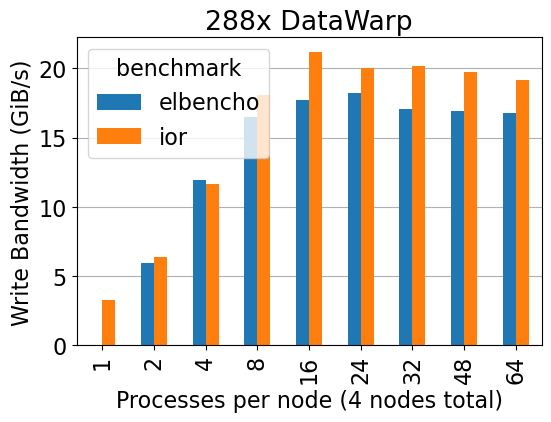

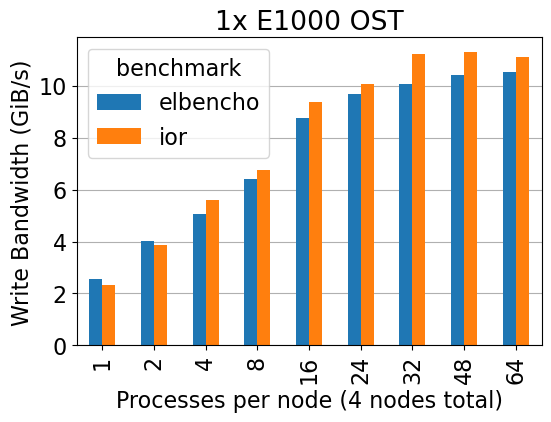

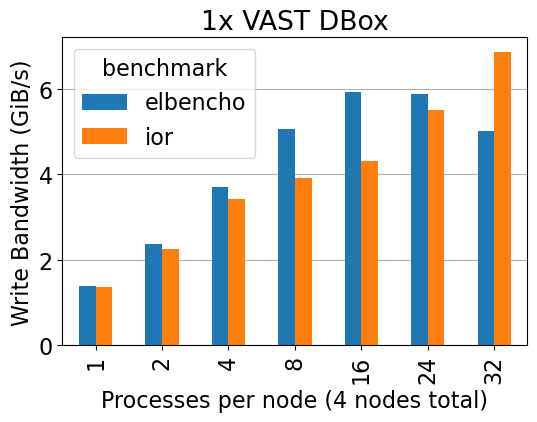

In [5]:
for file_system in FILE_SYSTEMS:
    print(file_system)
    try:
        plot_df = df[df['fs'] == file_system].pivot(index="ppn", columns="benchmark", values="bw(mib/s)") / 1024.0
    except ValueError:
        print(df[df['fs'] == file_system])
        continue
    ax = plot_df.plot.bar()
    ax.set_title(FILE_SYSTEMS.get(file_system, file_system))
    ax.set_ylabel("Write Bandwidth (GiB/s)")
    ax.set_xlabel("Processes per node (4 nodes total)")
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, which="major")